# [Keras](https://keras.io/)
* Environment require **Python 3+**
* Guide of how to do Deep learning with Keras module
---

## Before as a Deep Leaner... You Should Know...
---
## Artificial Neural Networks
## [DNN - Deep Neural Network](https://www.slideshare.net/tw_dsconf/ss-70083878)
* Fully Connected Neural Network 
* CNN (Convolution Neural Network)
* RNN (Recurrent Neural Network)
    * LSTM (Long Short-Term Memory)
    * GRU (Gated Recurrent Unit)

## Shopping Windows of Deep Leanrning
---

### Layers
   * Input 
   * Hidden
   * Output
<img src="https://content-static.upwork.com/blog/uploads/sites/3/2017/06/27095907/image-26.png"></img>

### Batch Size
  * Total/(Batch Size) = Weight Update Times per Epoch

### Epoch
  * Epoch * Total/(Batch Size) = Total Update Times

### Vanishing/Exploding Gradient

### [Weight Initializer](https://keras.io/initializers/#usage-of-initializers)

### [Activation Function](https://keras.io/activations/)
  * Sigmoid 
      * ★ **act='sigmoid'**
  * Relu, Elu 
      * ★ **act='relu'**
  * Elu 
      * ★ **act='elu'**
  * Hyperbolic Tangent 
      * ★ **act='tanh'**
  * Softmax 
      * ★ **act='softmax'**... 
  

       
### [Gradient Optimizer](https://keras.io/optimizers/)

  * SDG 
      * ★ **optimizer = SGD()**
  * Momenetum Optmization 
      * ★ **optimizer = SGD(momentum=0.5)**
  * NAG (Nesterove Accelerated Gradient) 
      * ★ **optimizer = SGD(momentum=0.5, nesterov=True)**
  * AdaGrad 
      * ★ **optimizer = Adagrad()**
  * RMSProp 
      * ★ **optimizer = RMSprop()**
  * Adam
      * ★ **optimizer = Adam()**
  
  <img src='http://2.bp.blogspot.com/-q6l20Vs4P_w/VPmIC7sEhnI/AAAAAAAACC4/g3UOUX2r_yA/s400/s25RsOr%2B-%2BImgur.gif' height='50' width='500'></img> 
<img src='http://1.bp.blogspot.com/-K_X-yud8nj8/VPmIBxwGlsI/AAAAAAAACC0/JS-h1fa09EQ/s400/Saddle%2BPoint%2B-%2BImgur.gif' height='50' width='600'></img>



### [Learning Rate](https://medium.com/towards-data-science/learning-rate-schedules-and-adaptive-learning-rate-methods-for-deep-learning-2c8f433990d1)
  * [Learning Rate Scheduling](https://machinelearningmastery.com/using-learning-rate-schedules-deep-learning-models-python-keras/)
  <img src='https://cdn-images-1.medium.com/max/1600/1*OjcTfMw6dmOmP4lRE7Ud-A.jpeg' height='50' width='900'></img>
  

### [Loss & Cost Function](https://keras.io/losses/#usage-of-loss-functions)
   * binary_crossentropy 
       * ★ **loss='binary_crossentropy'**
   * categorical_crossentropy 
       * ★ **loss='categorical_crossentropy'**
   * mean_squared_error 
       * ★ **loss='mean_squared_error'**
       
### [Accuracy](https://keras.io/metrics/#usage-of-metrics)


### Conquer Over Fitting
   * [Drop Out](https://keras.io/layers/core/#dropout) 
       * ★ **Dropout(0.5)**
   * [Early Stopping](https://keras.io/callbacks/)
       * ★ EarlyStopping(monitor = 'val_loss', patience = 3)
   * [l1 & l2 Weight Regularization](https://keras.io/regularizers/)
   * [Max-Norm Regularization](https://keras.io/constraints/#available-constraints)
   * [Data Augmentation](https://keras.io/preprocessing/image/)

## Others
* Reusing Pretrained Layers
* Freezing Lower Layer
* Transfer Learning
* Semi-supervised Learning

# Let's Keras

In [55]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.datasets import make_blobs, make_circles
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import SGD, RMSprop, Adagrad, Adam
from keras.utils import np_utils
from sklearn import preprocessing

In [4]:
def plot_AccLoss(his):
    for k, v in his.history.items():
        if (k == 'acc') | (k == 'val_acc'):
            plt.subplot(211)
            v = np.array(historyA.history[k])*100
            if k == 'acc': 
                label = 'Train Acc. = {}'.format(v[-1])
                plt.plot(range(len(v)), v, label=label, color='red')
            if k == 'val_acc': 
                label = 'Validation Acc. = {}'.format(v[-1])
                plt.plot(range(len(v)), v, label=label, color='green')
            plt.xlabel("Epochs")
            plt.ylabel("Accuracy %")
            plt.legend()
        if (k == 'loss') | (k == 'val_loss'):
            plt.subplot(212)
            v = historyA.history[k]
            if k == 'loss': 
                label = 'Train Loss. = {}'.format(v[-1])
                plt.plot(range(len(v)), v, label=label, color='red')
            if k == 'val_loss': 
                label = 'Validation Loss. = {}'.format(v[-1])
                plt.plot(range(len(v)), v, label=label, color='green')
            plt.xlabel("Epochs")
            plt.ylabel("Loss %")
            plt.legend()
        plt.tight_layout()

# DNN - Deep Neural Network

* Load Data Set

In [5]:
# load dataset
var = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = pd.read_csv('DataBase/ForModelCamparison.csv', names=var)
array = df.values

Features = array[:,0:8]
MinMax_Scale = preprocessing.MinMaxScaler(feature_range=(0,1))
X = MinMax_Scale.fit_transform(Features)
y = np_utils.to_categorical(array[:,8])

Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.20)
print('★ Training size : Testing size = ', len(ytr), ':', len(yte))
print('\tDimension of Xtr = ', Xtr.ndim)
print('\tShape of Xtr = ', Xtr.shape)
print('\tDimension of ytr = ', ytr.ndim)
print('\tShape of ytr = ', ytr.shape)

★ Training size : Testing size =  614 : 154
	Dimension of Xtr =  2
	Shape of Xtr =  (614, 8)
	Dimension of ytr =  2
	Shape of ytr =  (614, 2)


 32/154 [=====>........................] - ETA: 1s
Test set accuracy:  66.2337660789
Test set loss:  0.226620495319


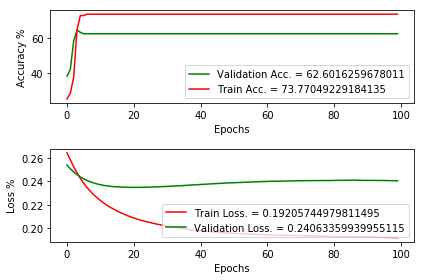

In [57]:
modelA = Sequential()

modelA.add(Dense(100, input_dim=8))
modelA.add(Activation('relu'))
# modelA.add(Dropout(0.5))

modelA.add(Dense(40))
modelA.add(Activation('relu'))
# modelA.add(Dropout(0.5))

modelA.add(Dense(2))
modelA.add(Activation('softmax'))

modelA.compile(loss='mean_squared_error',
               optimizer=SGD(lr=0.01, momentum=0.5, nesterov=True),
               metrics=['accuracy'])

# earlyStop = EarlyStopping(monitor = 'val_loss', patience = 3)


historyA = modelA.fit(Xtr, ytr, epochs=100,
                      batch_size=32, verbose=0,
                      validation_split=0.8,
                      # callbacks=[earlyStop]
                     )

resultA = modelA.evaluate(Xte, yte, verbose=0)
resultA_prob = modelA.predict_proba(Xte)

print('\nTest set accuracy: ', resultA[1]*100)
print('Test set loss: ', resultA[0])

plot_AccLoss(historyA)

In [58]:
modelA.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 100)               900       
_________________________________________________________________
activation_61 (Activation)   (None, 100)               0         
_________________________________________________________________
dense_62 (Dense)             (None, 40)                4040      
_________________________________________________________________
activation_62 (Activation)   (None, 40)                0         
_________________________________________________________________
dense_63 (Dense)             (None, 2)                 82        
_________________________________________________________________
activation_63 (Activation)   (None, 2)                 0         
Total params: 5,022
Trainable params: 5,022
Non-trainable params: 0
_________________________________________________________________


## Save Model as File

* Saving/loading weight only

In [25]:
from keras.models import load_model

In [26]:
modelA.save_weights('Models/DNN_modelA.h5')

In [27]:
modelA.load_weights('Models/DNN_modelA.h5')
modelA

* Saving/loading whole models (architecture + weights + optimizer state)

In [40]:
modelA.save('Models/Keras/DNN_modelA.h5')

In [41]:
modelA_Load = load_model('Models/Keras/DNN_modelA.h5')

## Evaluate With New Data

In [42]:
resultA_Load = modelA_Load.evaluate(Xte, yte, verbose=0)
print('New set accuracy: ', resultA_Load[1]*100)
print('New set loss: ', resultA_Load[0])

New set accuracy:  66.2337660789
New set loss:  0.22765758982


In [43]:
# Predict
resultA_Load_prob = modelA_Load.predict_proba(Xte)

 32/154 [=====>........................] - ETA: 0s

* Sections Evaluate *(**PredValue** & **TrueValue** could be arrary or list)*

In [44]:
import pandas as pd
TrueValue = yte[:,1]
PredValue = resultA_Load_prob[:, 1]

In [45]:
def Section14Eval(PredValue, TrueValue):
    df = pd.DataFrame({'Predict':['A_100_95','B_94-90','C_89-85','D_84-80','E_79-75','F_74-70','G_69-60',
                                  'H_59_50','I_49-40','J_39-30','K_29-20','L_19-10','M_09-05','N_04-00']})
    t = np.zeros(14, dtype=int)
    y = np.zeros(14, dtype=int)
    for i in range(0, len(PredValue)):
        if ((PredValue[i]<=1.0) & (PredValue[i]>=0.95)):
            t[0] = t[0]+1
            if TrueValue[i]==1:
                y[0] = y[0]+1
        elif ((PredValue[i]<0.95) & (PredValue[i]>=0.90)):
            t[1] = t[1]+1
            if TrueValue[i]==1:
                y[1] = y[1]+1
        elif ((PredValue[i]<0.90) & (PredValue[i]>=0.85)):
            t[2] = t[2]+1
            if TrueValue[i]==1:
                y[2] = y[2]+1
        elif ((PredValue[i]<0.85) & (PredValue[i]>=0.80)):
            t[3] = t[3]+1
            if TrueValue[i]==1:
                y[3] = y[3]+1
        elif ((PredValue[i]<0.80) & (PredValue[i]>=0.75)):
            t[4] = t[4]+1
            if TrueValue[i]==1:
                y[4] = y[4]+1
        elif ((PredValue[i]<0.75) & (PredValue[i]>=0.70)):
            t[5] = t[5]+1
            if TrueValue[i]==1:
                y[5] = y[5]+1
        elif ((PredValue[i]<0.70) & (PredValue[i]>=0.60)):
            t[6] = t[6]+1
            if TrueValue[i]==1:
                y[6] = y[6]+1
        elif ((PredValue[i]<0.60) & (PredValue[i]>=0.50)):
            t[7] = t[7]+1
            if TrueValue[i]==1:
                y[7] = y[7]+1
        elif ((PredValue[i]<0.50) & (PredValue[i]>=0.40)):
            t[8] = t[8]+1
            if TrueValue[i]==1:
                y[8] = y[8]+1
        elif ((PredValue[i]<0.40) & (PredValue[i]>=0.30)):
            t[9] = t[9]+1
            if TrueValue[i]==1:
                y[9] = y[9]+1
        elif ((PredValue[i]<0.30) & (PredValue[i]>=0.20)):
            t[10] = t[10]+1
            if TrueValue[i]==1:
                y[10] = y[10]+1
        elif ((PredValue[i]<0.20) & (PredValue[i]>=0.10)):
            t[11] = t[11]+1
            if TrueValue[i]==1:
                y[11] = y[11]+1
        elif ((PredValue[i]<0.10) & (PredValue[i]>=0.5)):
            t[12] = t[12]+1
            if TrueValue[i]==1:
                y[12] = y[12]+1
        else:
            t[13] = t[13]+1
            if TrueValue[i]==1:
                y[13] = y[13]+1
    df['Total'] = t
    df['True Y'] = y
    df['True N'] = df['Total']-df['True Y']
    return df

In [46]:
Section14Eval(PredValue, TrueValue)

,Predict,Total,True Y,True N
0,A_100_95,0,0,0
1,B_94-90,0,0,0
2,C_89-85,0,0,0
3,D_84-80,0,0,0
4,E_79-75,0,0,0
5,F_74-70,0,0,0
6,G_69-60,0,0,0
7,H_59_50,0,0,0
8,I_49-40,3,1,2
9,J_39-30,16,10,6


In [35]:
def Section2Eval(PredValue, TrueValue, cutoff=0.5):
    df = pd.DataFrame({})
    y_hat = PredValue>=cutoff
    y_actual = TrueValue 
    TP, FP, TN, FN = [0, 0, 0, 0]
    FN = 0
    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
    for i in range(len(y_hat)): 
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==0:
           TN += 1
    for i in range(len(y_hat)): 
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1
    df['True Y'] = [TP, FN]
    df['True N'] = [FP, TN]
    df.index=['Predict Y','Predict N']
    return  'Sen.:{:.4f}'.format(TP/(TP+FP*1.0+0.00001)),\
            'PPV.:{:.4f}'.format(TP/(TP+FN*1.0+0.00001)), \
            'Spe.:{:.4f}'.format(TN/(TN+FN*1.0+0.00001)),\
            'NPV.:{:.4f}'.format(TN/(TN+FP*1.0+0.00001)),\
            df

In [36]:
Sen,PPV,Spe,NPV,df= Section2Eval(PredValue,TrueValue,cutoff=0.5)
print(Sen,PPV,Spe,NPV)
df

Sen.:0.0000 PPV.:0.0000 Spe.:0.6623 NPV.:1.0000


,True Y,True N
Predict Y,0,0
Predict N,52,102


# CNN - Convolution Neural Network
### [Convolution Layer](https://keras.io/layers/convolutional/)/Stride
<a href='https://deeplearning4j.org/convolutionalnets.html'>Show action</a>
<img src='https://deeplearning4j.org/img/karpathy-convnet-labels.png' heights='200' width='600'></img>


### [Pooling Layer](https://keras.io/layers/pooling/)
<img src='http://d3kbpzbmcynnmx.cloudfront.net/wp-content/uploads/2015/11/Screen-Shot-2015-11-05-at-2.18.38-PM.png' heights='300' width='500'></img>

### Stride
* Stride = 1
<img src='https://adeshpande3.github.io/assets/Stride1.png' heights='200' width='600'></img>
* Stride = 2
<img src='https://adeshpande3.github.io/assets/Stride2.png' heights='200' width='600'></img>

## Question?
* 9 $*$ 9 fiter with 3 $*$ 3 Stride 1 = ?
* 9 $*$ 9 fiter wtih 3 $*$ 3 Stride 2 = ?

* Load Data Set

In [60]:
from tensorflow.examples.tutorials.mnist import input_data
from keras.layers.core import Dense, Dropout, Activation
from keras.layers import Conv2D, MaxPool2D, AveragePooling2D, Flatten
import matplotlib.pyplot as plt

In [61]:
mnist = input_data.read_data_sets("DataBase/")
X_train = mnist.train.images
y_train = mnist.train.labels
X_test = mnist.test.images
y_test = mnist.test.labels

Extracting DataBase/train-images-idx3-ubyte.gz
Extracting DataBase/train-labels-idx1-ubyte.gz
Extracting DataBase/t10k-images-idx3-ubyte.gz
Extracting DataBase/t10k-labels-idx1-ubyte.gz


In [62]:
print('★ Shape of train data = ', X_train.shape)
print('★ Shape of test data = ', X_test.shape)
print('★ X look like:\n',X_test)
print('★ y look like:\n', y_test)

★ Shape of train data =  (55000, 784)
★ Shape of test data =  (10000, 784)
★ X look like:
 [[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
★ y look like:
 [7 2 1 ..., 4 5 6]


In [63]:
X_tr = X_train.reshape(55000, 28, 28, 1).astype('float32')
X_te = X_test.reshape(10000, 28, 28, 1).astype('float32')
print('★ Shape of X_tr = ',X_tr.shape)

★ Shape of X_tr =  (55000, 28, 28, 1)


Answer =  0


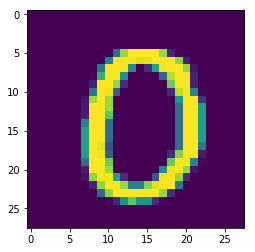

In [64]:
X_tr_img = X_train.reshape(55000, 28, 28).astype('float32')
plt.imshow(X_tr_img[10])
print('Answer = ', y_train[10])

* Category variable 1 hot transformation

In [65]:
y_tr_1h = np_utils.to_categorical(y_train, 10)
y_te_1h = np_utils.to_categorical(y_test, 10)

Train on 55000 samples, validate on 10000 samples
Epoch 1/2
55000/55000 [==============================] - 508s - loss: 0.4458 - acc: 0.8571 - val_loss: 0.1441 - val_acc: 0.9572
Epoch 2/2
 9984/10000 [============================>.] - ETA: 0s
Test set accuracy:  97.42
Test set loss:  0.0847954378963


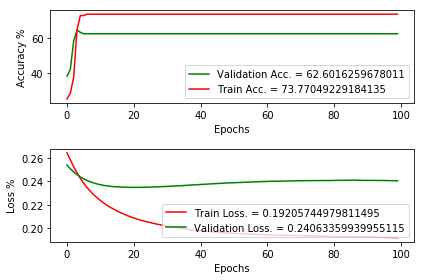

In [69]:
modelB = Sequential()

modelB.add(Conv2D(300, (2, 2),
                 padding='same',
                 input_shape=(28, 28, 1),
                 activation='relu'))
modelB.add(MaxPool2D(pool_size=(2, 2)))
modelB.add(Dropout(0.5))

modelB.add(Conv2D(50, (2, 2), 
                 padding='same',
                 activation='relu'))
modelB.add(MaxPool2D(pool_size=(2, 2)))
modelB.add(Dropout(0.5))

modelB.add(Flatten())
modelB.add(Dense(10, activation='softmax'))

modelB.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

# Fit your model
historyB = modelB.fit(X_tr, y_tr_1h, epochs=2,
                     batch_size=200, verbose=1,
                     validation_data=(X_te, y_te_1h),
                     shuffle=True)


resultB = modelB.evaluate(X_te, y_te_1h, verbose=0)
resultB_prob = modelB.predict_proba(X_te)

print('\nTest set accuracy: ', resultB[1]*100)
print('Test set loss: ', resultB[0])

plot_AccLoss(historyB)

In [151]:
modelB.save('Models/Keras/DNN_modelB.h5')

In [147]:
modelB_Load = load_model('Models/Keras/DNN_modelB.h5')

In [148]:
resultB_Load = modelB_Load.evaluate(X_te, y_te_1h, verbose=0)
print('New set accuracy: ', resultB_Load[1]*100)
print('New set loss: ', resultB_Load[0])

New set accuracy:  97.54
New set loss:  0.0737456482816


## RNN - Recurrent Neural Network

## GRU - Gated Recurrent Unit

## LSTM - Long Short-Term Memory

In [ ]:
Lab07